In [1]:
import os
import random
import sys

import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import numpy as np

#from sklearn.svm import SVR
#from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error

#from sklearn.linear_model import Ridge

from sklearn.kernel_ridge import KernelRidge
from sklearn.metrics import mean_absolute_error
#from sklearn.multioutput import MultiOutputRegressor
import math
#from yellowbrick.regressor import ResidualsPlot
#from sklearn.metrics import r2_score
from sklearn.gaussian_process import GaussianProcessRegressor
import matplotlib.pyplot as plt
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RBF, Matern, ConstantKernel

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats



In [3]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

from sklearn.preprocessing import PowerTransformer

In [4]:


import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from keras.regularizers import l2



In [5]:
from sklearn.metrics import mean_absolute_error
from sklearn.kernel_ridge import KernelRidge

In [6]:
df=pd.read_excel("database_new.xlsx")

# Random split NN

# With Powertransform 

Set 1 of input

In [17]:

# Load dataset
X = df.iloc[:, [0, 7, 30]]
Y = df.iloc[:, [1,2]]
X_train, X_test, Y_train, Y_test =train_test_split(X, Y,test_size=0.3,random_state=int(np.random.randint(2,100, size=1)))




# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)

#scaling_y = PowerTransformer(method='box-cox')

#Y_train_transformed = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(3,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(2, kernel_initializer='he_normal', activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('inverse_q_abs/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train_transformed, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('inverse_q_abs/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Evaluate plus inverse transforms

# Inverse transform
#Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test_transformed)
Y_pred = pd.DataFrame(data=Y_pred, columns=["fractal_dimension", "fraction_of_coating"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["fractal_dimension", "fraction_of_coating"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-  ', error)




                cols  box_cox_lambdas
0         wavelength        -1.879182
1  equi_mobility_dia         0.174852
2              c_abs         0.098732
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 

325/325 [==============================] - 2s 6ms/step - loss: 16.3905 - mean_absolute_error: 2.1351 - val_loss: 36.1859 - val_mean_absolute_error: 3.2209

Epoch 00065: val_loss did not improve from 11.97701
Epoch 66/1000
325/325 [==============================] - 2s 6ms/step - loss: 15.7280 - mean_absolute_error: 2.1319 - val_loss: 12.7026 - val_mean_absolute_error: 2.0569

Epoch 00066: val_loss did not improve from 11.97701
Epoch 67/1000
325/325 [==============================] - 2s 6ms/step - loss: 14.4630 - mean_absolute_error: 2.0689 - val_loss: 12.1858 - val_mean_absolute_error: 1.8780

Epoch 00067: val_loss did not improve from 11.97701
Epoch 68/1000
325/325 [==============================] - 2s 6ms/step - loss: 12.7639 - mean_absolute_error: 1.9370 - val_loss: 12.4060 - val_mean_absolute_error: 1.9372

Epoch 00068: val_loss did not improve from 11.97701
Epoch 69/1000
325/325 [==============================] - 2s 6ms/step - loss: 13.0536 - mean_absolute_error: 1.9717 - val_loss:


Epoch 00137: val_loss did not improve from 11.31431
Epoch 138/1000
325/325 [==============================] - 2s 6ms/step - loss: 12.1049 - mean_absolute_error: 1.8935 - val_loss: 17.3982 - val_mean_absolute_error: 2.3786

Epoch 00138: val_loss did not improve from 11.31431
Epoch 139/1000
325/325 [==============================] - 2s 6ms/step - loss: 11.9169 - mean_absolute_error: 1.8703 - val_loss: 13.0305 - val_mean_absolute_error: 2.0499

Epoch 00139: val_loss did not improve from 11.31431
Epoch 140/1000
325/325 [==============================] - 2s 6ms/step - loss: 11.7952 - mean_absolute_error: 1.8718 - val_loss: 11.1259 - val_mean_absolute_error: 1.7653

Epoch 00140: val_loss improved from 11.31431 to 11.12590, saving model to inverse_q_abs\best_model.hdf5
Epoch 141/1000
325/325 [==============================] - 2s 6ms/step - loss: 11.9279 - mean_absolute_error: 1.8831 - val_loss: 11.9674 - val_mean_absolute_error: 1.8455

Epoch 00141: val_loss did not improve from 11.12590
Epo


Epoch 00210: val_loss did not improve from 10.94809
Epoch 211/1000
325/325 [==============================] - 2s 6ms/step - loss: 11.3183 - mean_absolute_error: 1.8124 - val_loss: 12.3730 - val_mean_absolute_error: 2.0360

Epoch 00211: val_loss did not improve from 10.94809
Epoch 212/1000
325/325 [==============================] - 2s 6ms/step - loss: 11.1847 - mean_absolute_error: 1.8097 - val_loss: 11.3422 - val_mean_absolute_error: 1.8545

Epoch 00212: val_loss did not improve from 10.94809
Epoch 213/1000
325/325 [==============================] - 2s 6ms/step - loss: 11.1828 - mean_absolute_error: 1.8137 - val_loss: 12.1314 - val_mean_absolute_error: 1.8806

Epoch 00213: val_loss did not improve from 10.94809
Epoch 214/1000
325/325 [==============================] - 2s 6ms/step - loss: 10.9160 - mean_absolute_error: 1.7803 - val_loss: 11.6091 - val_mean_absolute_error: 1.7783

Epoch 00214: val_loss did not improve from 10.94809
Epoch 215/1000
325/325 [==============================]

325/325 [==============================] - 2s 6ms/step - loss: 10.7177 - mean_absolute_error: 1.7512 - val_loss: 11.4323 - val_mean_absolute_error: 1.8576

Epoch 00284: val_loss did not improve from 10.88593
Epoch 285/1000
325/325 [==============================] - 2s 6ms/step - loss: 10.7624 - mean_absolute_error: 1.7587 - val_loss: 11.3107 - val_mean_absolute_error: 1.8037

Epoch 00285: val_loss did not improve from 10.88593
Epoch 286/1000
325/325 [==============================] - 2s 6ms/step - loss: 10.7717 - mean_absolute_error: 1.7531 - val_loss: 11.2285 - val_mean_absolute_error: 1.8151

Epoch 00286: val_loss did not improve from 10.88593
Epoch 287/1000
325/325 [==============================] - 2s 6ms/step - loss: 10.9956 - mean_absolute_error: 1.7831 - val_loss: 12.2771 - val_mean_absolute_error: 1.8679

Epoch 00287: val_loss did not improve from 10.88593
Epoch 288/1000
325/325 [==============================] - 2s 6ms/step - loss: 10.9090 - mean_absolute_error: 1.7825 - val_l

325/325 [==============================] - 2s 6ms/step - loss: 11.0663 - mean_absolute_error: 1.7786 - val_loss: 11.6327 - val_mean_absolute_error: 1.8517

Epoch 00321: val_loss did not improve from 10.88593
Epoch 322/1000
325/325 [==============================] - 2s 6ms/step - loss: 10.7553 - mean_absolute_error: 1.7688 - val_loss: 11.7396 - val_mean_absolute_error: 1.8369

Epoch 00322: val_loss did not improve from 10.88593
Epoch 323/1000
325/325 [==============================] - 2s 6ms/step - loss: 10.6247 - mean_absolute_error: 1.7440 - val_loss: 11.4004 - val_mean_absolute_error: 1.7420

Epoch 00323: val_loss did not improve from 10.88593
Epoch 324/1000
325/325 [==============================] - 2s 6ms/step - loss: 11.0665 - mean_absolute_error: 1.7866 - val_loss: 11.3155 - val_mean_absolute_error: 1.7595

Epoch 00324: val_loss did not improve from 10.88593
Epoch 325/1000
325/325 [==============================] - 2s 6ms/step - loss: 10.8131 - mean_absolute_error: 1.7651 - val_l

Set 2 of input

In [7]:

# Load dataset
X = df.iloc[:, [0, 7, 30,31]]
Y = df.iloc[:, [1,2]]
X_train, X_test, Y_train, Y_test =train_test_split(X, Y,test_size=0.3,random_state=int(np.random.randint(2,100, size=1)))




# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)

#scaling_y = PowerTransformer(method='box-cox')

#Y_train_transformed = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(4,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(2, kernel_initializer='he_normal', activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('inverse_q_abs/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train_transformed, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('inverse_q_abs/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Evaluate plus inverse transforms

# Inverse transform
#Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test_transformed)
Y_pred = pd.DataFrame(data=Y_pred, columns=["fractal_dimension", "fraction_of_coating"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["fractal_dimension", "fraction_of_coating"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-  ', error)




                cols  box_cox_lambdas
0         wavelength        -1.836334
1  equi_mobility_dia         0.179399
2              c_abs         0.100142
3              c_sca         0.095532
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
________________________________________________________________


Epoch 00065: val_loss did not improve from 3.54480
Epoch 66/1000
325/325 [==============================] - 2s 6ms/step - loss: 3.8806 - mean_absolute_error: 0.9853 - val_loss: 3.8757 - val_mean_absolute_error: 1.0431

Epoch 00066: val_loss did not improve from 3.54480
Epoch 67/1000
325/325 [==============================] - 2s 6ms/step - loss: 4.2161 - mean_absolute_error: 1.0391 - val_loss: 4.7451 - val_mean_absolute_error: 1.0262

Epoch 00067: val_loss did not improve from 3.54480
Epoch 68/1000
325/325 [==============================] - 2s 6ms/step - loss: 4.4575 - mean_absolute_error: 1.0493 - val_loss: 3.8366 - val_mean_absolute_error: 0.9428

Epoch 00068: val_loss did not improve from 3.54480
Epoch 69/1000
325/325 [==============================] - 2s 6ms/step - loss: 4.3533 - mean_absolute_error: 1.0276 - val_loss: 3.4340 - val_mean_absolute_error: 0.8446

Epoch 00069: val_loss improved from 3.54480 to 3.43404, saving model to inverse_q_abs\best_model.hdf5
Epoch 70/1000
325/325


Epoch 00102: val_loss did not improve from 3.04730
Epoch 103/1000
325/325 [==============================] - 2s 6ms/step - loss: 4.3123 - mean_absolute_error: 1.0309 - val_loss: 3.8538 - val_mean_absolute_error: 0.9264

Epoch 00103: val_loss did not improve from 3.04730
Epoch 104/1000
325/325 [==============================] - 2s 6ms/step - loss: 3.7611 - mean_absolute_error: 0.9769 - val_loss: 3.0996 - val_mean_absolute_error: 0.8213

Epoch 00104: val_loss did not improve from 3.04730
Epoch 105/1000
325/325 [==============================] - 2s 6ms/step - loss: 3.3833 - mean_absolute_error: 0.8893 - val_loss: 3.6495 - val_mean_absolute_error: 0.9844

Epoch 00105: val_loss did not improve from 3.04730
Epoch 106/1000
325/325 [==============================] - 2s 6ms/step - loss: 3.7492 - mean_absolute_error: 0.9749 - val_loss: 4.5107 - val_mean_absolute_error: 1.0189

Epoch 00106: val_loss did not improve from 3.04730
Epoch 107/1000
325/325 [==============================] - 2s 6ms/ste


Epoch 00139: val_loss did not improve from 3.02358
Epoch 140/1000
325/325 [==============================] - 2s 6ms/step - loss: 3.2986 - mean_absolute_error: 0.8965 - val_loss: 3.1657 - val_mean_absolute_error: 0.8007

Epoch 00140: val_loss did not improve from 3.02358
Epoch 141/1000
325/325 [==============================] - 2s 6ms/step - loss: 3.0281 - mean_absolute_error: 0.8616 - val_loss: 2.6152 - val_mean_absolute_error: 0.7201

Epoch 00141: val_loss improved from 3.02358 to 2.61520, saving model to inverse_q_abs\best_model.hdf5
Epoch 142/1000
325/325 [==============================] - 2s 6ms/step - loss: 2.9544 - mean_absolute_error: 0.8249 - val_loss: 3.9916 - val_mean_absolute_error: 1.0129

Epoch 00142: val_loss did not improve from 2.61520
Epoch 143/1000
325/325 [==============================] - 2s 6ms/step - loss: 2.9779 - mean_absolute_error: 0.8296 - val_loss: 4.6956 - val_mean_absolute_error: 1.1574

Epoch 00143: val_loss did not improve from 2.61520
Epoch 144/1000
32

325/325 [==============================] - 2s 6ms/step - loss: 3.4552 - mean_absolute_error: 0.8831 - val_loss: 3.1407 - val_mean_absolute_error: 0.7538

Epoch 00177: val_loss did not improve from 2.61520
Epoch 178/1000
325/325 [==============================] - 2s 6ms/step - loss: 2.7651 - mean_absolute_error: 0.7706 - val_loss: 2.9104 - val_mean_absolute_error: 0.8014

Epoch 00178: val_loss did not improve from 2.61520
Epoch 179/1000
325/325 [==============================] - 2s 6ms/step - loss: 3.1313 - mean_absolute_error: 0.8451 - val_loss: 4.6331 - val_mean_absolute_error: 1.0556

Epoch 00179: val_loss did not improve from 2.61520
Epoch 180/1000
325/325 [==============================] - 2s 6ms/step - loss: 3.2094 - mean_absolute_error: 0.8486 - val_loss: 3.9924 - val_mean_absolute_error: 0.9026

Epoch 00180: val_loss did not improve from 2.61520
Epoch 181/1000
325/325 [==============================] - 2s 6ms/step - loss: 3.3163 - mean_absolute_error: 0.8566 - val_loss: 4.6092 -

325/325 [==============================] - 2s 6ms/step - loss: 2.6434 - mean_absolute_error: 0.7424 - val_loss: 4.3388 - val_mean_absolute_error: 1.0027

Epoch 00214: val_loss did not improve from 2.49242
Epoch 215/1000
325/325 [==============================] - 2s 6ms/step - loss: 2.7093 - mean_absolute_error: 0.7632 - val_loss: 3.8504 - val_mean_absolute_error: 0.8983

Epoch 00215: val_loss did not improve from 2.49242
Epoch 216/1000
325/325 [==============================] - 2s 6ms/step - loss: 3.0134 - mean_absolute_error: 0.8151 - val_loss: 3.4949 - val_mean_absolute_error: 0.8454

Epoch 00216: val_loss did not improve from 2.49242
Epoch 217/1000
325/325 [==============================] - 2s 6ms/step - loss: 2.5622 - mean_absolute_error: 0.7301 - val_loss: 4.6946 - val_mean_absolute_error: 1.0383

Epoch 00217: val_loss did not improve from 2.49242
Epoch 218/1000
325/325 [==============================] - 2s 6ms/step - loss: 2.4676 - mean_absolute_error: 0.7269 - val_loss: 2.9241 -

325/325 [==============================] - 2s 6ms/step - loss: 2.5120 - mean_absolute_error: 0.7331 - val_loss: 3.1929 - val_mean_absolute_error: 0.7508

Epoch 00288: val_loss did not improve from 2.43339
Epoch 289/1000
325/325 [==============================] - 2s 6ms/step - loss: 2.3103 - mean_absolute_error: 0.6883 - val_loss: 2.9484 - val_mean_absolute_error: 0.7670

Epoch 00289: val_loss did not improve from 2.43339
Epoch 290/1000
325/325 [==============================] - 2s 6ms/step - loss: 2.5546 - mean_absolute_error: 0.7417 - val_loss: 2.7533 - val_mean_absolute_error: 0.7858

Epoch 00290: val_loss did not improve from 2.43339
Epoch 291/1000
325/325 [==============================] - 2s 6ms/step - loss: 2.8611 - mean_absolute_error: 0.7906 - val_loss: 7.1289 - val_mean_absolute_error: 1.2622

Epoch 00291: val_loss did not improve from 2.43339
Epoch 292/1000
325/325 [==============================] - 2s 6ms/step - loss: 2.6455 - mean_absolute_error: 0.7354 - val_loss: 3.9451 -

# Leave q_abs>=0.5 and <=0.8 as test set NN

# With Powertransform 

Set 1 of input

In [7]:


# Load dataset

train_set=df[(df['q_abs']<0.5) | (df['q_abs']>0.8)]
test_set=df[(df['q_abs']>=0.5) & (df['q_abs']<=0.8)]
test_set.sort_values(by=['q_abs'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 7, 30]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 7, 30]]





# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)

#scaling_y = PowerTransformer(method='box-cox')

#Y_train_transformed = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(3,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(2, kernel_initializer='he_normal', activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('inverse_q_abs/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train_transformed, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('inverse_q_abs/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Evaluate plus inverse transforms

# Inverse transform
#Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test_transformed)
Y_pred = pd.DataFrame(data=Y_pred, columns=["fractal_dimension", "fraction_of_coating"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["fractal_dimension", "fraction_of_coating"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-  ', error)




C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


                cols  box_cox_lambdas
0         wavelength        -1.635834
1  equi_mobility_dia         0.170579
2              c_abs         0.073742
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 

347/347 [==============================] - 2s 5ms/step - loss: 11.9645 - mean_absolute_error: 1.8335 - val_loss: 52.3265 - val_mean_absolute_error: 4.1165

Epoch 00030: val_loss did not improve from 43.95425
Epoch 31/1000
347/347 [==============================] - 2s 5ms/step - loss: 12.4836 - mean_absolute_error: 1.8116 - val_loss: 49.5625 - val_mean_absolute_error: 3.9439

Epoch 00031: val_loss did not improve from 43.95425
Epoch 32/1000
347/347 [==============================] - 2s 5ms/step - loss: 14.6081 - mean_absolute_error: 1.9926 - val_loss: 89.5961 - val_mean_absolute_error: 5.5343

Epoch 00032: val_loss did not improve from 43.95425
Epoch 33/1000
347/347 [==============================] - 2s 5ms/step - loss: 9.4226 - mean_absolute_error: 1.6693 - val_loss: 46.7940 - val_mean_absolute_error: 3.6679

Epoch 00033: val_loss did not improve from 43.95425
Epoch 34/1000
347/347 [==============================] - 2s 5ms/step - loss: 11.9716 - mean_absolute_error: 1.8338 - val_loss: 

347/347 [==============================] - 2s 5ms/step - loss: 10.6613 - mean_absolute_error: 1.7636 - val_loss: 61.0532 - val_mean_absolute_error: 4.1857

Epoch 00067: val_loss did not improve from 39.95884
Epoch 68/1000
347/347 [==============================] - 2s 5ms/step - loss: 7.7334 - mean_absolute_error: 1.5135 - val_loss: 44.3641 - val_mean_absolute_error: 3.7070

Epoch 00068: val_loss did not improve from 39.95884
Epoch 69/1000
347/347 [==============================] - 2s 5ms/step - loss: 7.5987 - mean_absolute_error: 1.5093 - val_loss: 48.0093 - val_mean_absolute_error: 3.7130

Epoch 00069: val_loss did not improve from 39.95884
Epoch 70/1000
347/347 [==============================] - 2s 5ms/step - loss: 7.7751 - mean_absolute_error: 1.5158 - val_loss: 49.4334 - val_mean_absolute_error: 3.8529

Epoch 00070: val_loss did not improve from 39.95884
Epoch 71/1000
347/347 [==============================] - 2s 5ms/step - loss: 7.4379 - mean_absolute_error: 1.4724 - val_loss: 56.

347/347 [==============================] - 2s 6ms/step - loss: 6.9650 - mean_absolute_error: 1.4256 - val_loss: 40.5196 - val_mean_absolute_error: 3.5639

Epoch 00141: val_loss did not improve from 39.95884
Epoch 142/1000
347/347 [==============================] - 2s 6ms/step - loss: 6.9127 - mean_absolute_error: 1.4229 - val_loss: 44.2287 - val_mean_absolute_error: 3.5761

Epoch 00142: val_loss did not improve from 39.95884
Epoch 143/1000
347/347 [==============================] - 2s 5ms/step - loss: 7.0802 - mean_absolute_error: 1.4420 - val_loss: 55.5477 - val_mean_absolute_error: 4.2344

Epoch 00143: val_loss did not improve from 39.95884
Epoch 144/1000
347/347 [==============================] - 2s 6ms/step - loss: 6.7438 - mean_absolute_error: 1.4070 - val_loss: 44.0905 - val_mean_absolute_error: 3.5777

Epoch 00144: val_loss did not improve from 39.95884
Epoch 145/1000
347/347 [==============================] - 2s 6ms/step - loss: 6.9354 - mean_absolute_error: 1.4309 - val_loss: 

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Set 2 of input

In [7]:


# Load dataset

train_set=df[(df['q_abs']<0.5) | (df['q_abs']>0.8)]
test_set=df[(df['q_abs']>=0.5) & (df['q_abs']<=0.8)]
test_set.sort_values(by=['q_abs'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 7, 30,31]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 7, 30,31]]




# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)

#scaling_y = PowerTransformer(method='box-cox')

#Y_train_transformed = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(4,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(2, kernel_initializer='he_normal', activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('inverse_q_abs/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train_transformed, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('inverse_q_abs/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Evaluate plus inverse transforms

# Inverse transform
#Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test_transformed)
Y_pred = pd.DataFrame(data=Y_pred, columns=["fractal_dimension", "fraction_of_coating"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["fractal_dimension", "fraction_of_coating"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-  ', error)




C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


                cols  box_cox_lambdas
0         wavelength        -1.635834
1  equi_mobility_dia         0.170579
2              c_abs         0.073742
3              c_sca         0.082446
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
________________________________________________________________

347/347 [==============================] - 2s 6ms/step - loss: 3.0394 - mean_absolute_error: 0.8890 - val_loss: 73.4653 - val_mean_absolute_error: 4.4389

Epoch 00067: val_loss did not improve from 49.83532
Epoch 68/1000
347/347 [==============================] - 2s 6ms/step - loss: 2.6491 - mean_absolute_error: 0.8276 - val_loss: 94.4440 - val_mean_absolute_error: 5.2703

Epoch 00068: val_loss did not improve from 49.83532
Epoch 69/1000
347/347 [==============================] - 2s 6ms/step - loss: 2.0856 - mean_absolute_error: 0.7566 - val_loss: 102.3707 - val_mean_absolute_error: 5.6854

Epoch 00069: val_loss did not improve from 49.83532
Epoch 70/1000
347/347 [==============================] - 2s 6ms/step - loss: 2.7479 - mean_absolute_error: 0.8767 - val_loss: 110.1364 - val_mean_absolute_error: 5.9491

Epoch 00070: val_loss did not improve from 49.83532
Epoch 71/1000
347/347 [==============================] - 2s 6ms/step - loss: 2.5969 - mean_absolute_error: 0.8189 - val_loss: 88

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Leave q_abs>=1.4 as test NN

# With Powertransform 

Set 1 of input

In [7]:

# Load dataset

train_set = df[(df['q_abs'] < 1.4)]
test_set = df[(df['q_abs'] >= 1.4)]
test_set.sort_values(by=['q_abs'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 7, 30]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 7, 30]]






# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)

#scaling_y = PowerTransformer(method='box-cox')

#Y_train_transformed = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(3,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(2, kernel_initializer='he_normal', activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('inverse_q_abs/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train_transformed, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('inverse_q_abs/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Evaluate plus inverse transforms

# Inverse transform
#Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test_transformed)
Y_pred = pd.DataFrame(data=Y_pred, columns=["fractal_dimension", "fraction_of_coating"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["fractal_dimension", "fraction_of_coating"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-  ', error)




C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


                cols  box_cox_lambdas
0         wavelength        -1.301203
1  equi_mobility_dia         0.144653
2              c_abs         0.099550
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 

432/432 [==============================] - 3s 6ms/step - loss: 7.8996 - mean_absolute_error: 1.5575 - val_loss: 29.9134 - val_mean_absolute_error: 3.1276

Epoch 00065: val_loss did not improve from 22.78919
Epoch 66/1000
432/432 [==============================] - 3s 6ms/step - loss: 7.4762 - mean_absolute_error: 1.5158 - val_loss: 24.3603 - val_mean_absolute_error: 2.9948

Epoch 00066: val_loss did not improve from 22.78919
Epoch 67/1000
432/432 [==============================] - 3s 7ms/step - loss: 7.0705 - mean_absolute_error: 1.4682 - val_loss: 26.0784 - val_mean_absolute_error: 3.0390

Epoch 00067: val_loss did not improve from 22.78919
Epoch 68/1000
432/432 [==============================] - 3s 6ms/step - loss: 8.6985 - mean_absolute_error: 1.5894 - val_loss: 24.4311 - val_mean_absolute_error: 3.0440

Epoch 00068: val_loss did not improve from 22.78919
Epoch 69/1000
432/432 [==============================] - 3s 7ms/step - loss: 7.2447 - mean_absolute_error: 1.4824 - val_loss: 24.4


Epoch 00101: val_loss did not improve from 22.54327
Epoch 102/1000
432/432 [==============================] - 3s 6ms/step - loss: 6.7548 - mean_absolute_error: 1.4383 - val_loss: 29.6839 - val_mean_absolute_error: 3.1437

Epoch 00102: val_loss did not improve from 22.54327
Epoch 103/1000
432/432 [==============================] - 3s 7ms/step - loss: 6.5801 - mean_absolute_error: 1.4104 - val_loss: 25.5004 - val_mean_absolute_error: 3.0774

Epoch 00103: val_loss did not improve from 22.54327
Epoch 104/1000
432/432 [==============================] - 3s 6ms/step - loss: 7.1892 - mean_absolute_error: 1.4794 - val_loss: 23.6408 - val_mean_absolute_error: 2.7885

Epoch 00104: val_loss did not improve from 22.54327
Epoch 105/1000
432/432 [==============================] - 3s 6ms/step - loss: 7.4170 - mean_absolute_error: 1.4907 - val_loss: 26.2944 - val_mean_absolute_error: 2.9496

Epoch 00105: val_loss did not improve from 22.54327
Epoch 106/1000
432/432 [==============================] - 3

432/432 [==============================] - 3s 7ms/step - loss: 6.2004 - mean_absolute_error: 1.3635 - val_loss: 26.3741 - val_mean_absolute_error: 2.9105

Epoch 00175: val_loss did not improve from 22.35453
Epoch 176/1000
432/432 [==============================] - 3s 7ms/step - loss: 6.1988 - mean_absolute_error: 1.3581 - val_loss: 37.7183 - val_mean_absolute_error: 3.3794

Epoch 00176: val_loss did not improve from 22.35453
Epoch 177/1000
432/432 [==============================] - 3s 6ms/step - loss: 6.4979 - mean_absolute_error: 1.3989 - val_loss: 24.3252 - val_mean_absolute_error: 2.8872

Epoch 00177: val_loss did not improve from 22.35453
Epoch 178/1000
432/432 [==============================] - 3s 7ms/step - loss: 6.3056 - mean_absolute_error: 1.3717 - val_loss: 29.8285 - val_mean_absolute_error: 2.9956

Epoch 00178: val_loss did not improve from 22.35453
Epoch 179/1000
432/432 [==============================] - 3s 7ms/step - loss: 6.2537 - mean_absolute_error: 1.3631 - val_loss: 

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Set 2 of input

In [7]:

# Load dataset

train_set = df[(df['q_abs'] < 1.4)]
test_set = df[(df['q_abs'] >= 1.4)]
test_set.sort_values(by=['q_abs'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:, [1,2]]
X_train = train_set.iloc[:, [0, 7, 30, 31]]
Y_test = test_set.iloc[:, [1,2]]
X_test = test_set.iloc[:, [0, 7, 30, 31]]





# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)

#scaling_y = PowerTransformer(method='box-cox')

#Y_train_transformed = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(4,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(2, kernel_initializer='he_normal', activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('inverse_q_abs/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train_transformed, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('inverse_q_abs/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Evaluate plus inverse transforms

# Inverse transform
#Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test_transformed)
Y_pred = pd.DataFrame(data=Y_pred, columns=["fractal_dimension", "fraction_of_coating"])
Y_test.reset_index(inplace=True)
Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["fractal_dimension", "fraction_of_coating"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set ["fractal_dimension", "fraction_of_coating"]:-  ', error)




C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


                cols  box_cox_lambdas
0         wavelength        -1.301203
1  equi_mobility_dia         0.144653
2              c_abs         0.099550
3              c_sca         0.089086
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               2560      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
________________________________________________________________


Epoch 00029: val_loss did not improve from 58.34642
Epoch 30/1000
432/432 [==============================] - 2s 6ms/step - loss: 5.1974 - mean_absolute_error: 1.1190 - val_loss: 167.2935 - val_mean_absolute_error: 7.9996

Epoch 00030: val_loss did not improve from 58.34642
Epoch 31/1000
432/432 [==============================] - 3s 6ms/step - loss: 3.6211 - mean_absolute_error: 0.9330 - val_loss: 163.0602 - val_mean_absolute_error: 7.7072

Epoch 00031: val_loss did not improve from 58.34642
Epoch 32/1000
432/432 [==============================] - 3s 8ms/step - loss: 2.5527 - mean_absolute_error: 0.8220 - val_loss: 132.9902 - val_mean_absolute_error: 6.5732

Epoch 00032: val_loss did not improve from 58.34642
Epoch 33/1000
432/432 [==============================] - 3s 6ms/step - loss: 3.8569 - mean_absolute_error: 0.9858 - val_loss: 107.0733 - val_mean_absolute_error: 5.9400

Epoch 00033: val_loss did not improve from 58.34642
Epoch 34/1000
432/432 [==============================] - 3s


Epoch 00066: val_loss did not improve from 58.34642
Epoch 67/1000
432/432 [==============================] - 2s 6ms/step - loss: 2.1339 - mean_absolute_error: 0.7073 - val_loss: 154.3478 - val_mean_absolute_error: 7.2963

Epoch 00067: val_loss did not improve from 58.34642
Epoch 68/1000
432/432 [==============================] - 2s 6ms/step - loss: 1.6839 - mean_absolute_error: 0.6475 - val_loss: 131.1674 - val_mean_absolute_error: 6.3738

Epoch 00068: val_loss did not improve from 58.34642
Epoch 69/1000
432/432 [==============================] - 3s 6ms/step - loss: 1.9981 - mean_absolute_error: 0.7184 - val_loss: 168.7159 - val_mean_absolute_error: 7.5253

Epoch 00069: val_loss did not improve from 58.34642
Epoch 70/1000
432/432 [==============================] - 3s 6ms/step - loss: 2.0570 - mean_absolute_error: 0.7132 - val_loss: 126.2662 - val_mean_absolute_error: 6.1488

Epoch 00070: val_loss did not improve from 58.34642
Epoch 71/1000
432/432 [==============================] - 2s


Epoch 00103: val_loss did not improve from 58.34642
Epoch 104/1000
432/432 [==============================] - 2s 6ms/step - loss: 1.3985 - mean_absolute_error: 0.5887 - val_loss: 78.7116 - val_mean_absolute_error: 4.8389

Epoch 00104: val_loss did not improve from 58.34642
Epoch 105/1000
432/432 [==============================] - 2s 6ms/step - loss: 1.4226 - mean_absolute_error: 0.5846 - val_loss: 100.2121 - val_mean_absolute_error: 5.6464

Epoch 00105: val_loss did not improve from 58.34642
Epoch 106/1000
432/432 [==============================] - 2s 6ms/step - loss: 1.9107 - mean_absolute_error: 0.6779 - val_loss: 131.0500 - val_mean_absolute_error: 6.7410

Epoch 00106: val_loss did not improve from 58.34642
Epoch 107/1000
432/432 [==============================] - 2s 6ms/step - loss: 1.4337 - mean_absolute_error: 0.5719 - val_loss: 107.0535 - val_mean_absolute_error: 5.8562

Epoch 00107: val_loss did not improve from 58.34642
Epoch 108/1000
432/432 [==============================] 

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


# Gaussian process regression

In [7]:

# Load dataset
X = df.iloc[:,:8]
Y = df.iloc[:,25:28]
X_train, X_test, Y_train, Y_test = split_randomly(X,Y)

kernel = ConstantKernel() + Matern(length_scale=2, nu=3/2) + WhiteKernel(noise_level=1)
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X_train, Y_train)

In [8]:
Y_pred=gpr.predict(X_test)

In [9]:
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)

Mean absolute error on test set [q_abs, q_sca, g]:-   [0.01357077 0.06389015 0.04569107]


In [15]:

# Load dataset
X = df.iloc[:,:8]
Y = df.iloc[:,25:28]
X_train, X_test, Y_train, Y_test = split_randomly(X,Y)
pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)
kernel = RBF()
gpr = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(X_train_transformed, Y_train)

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\gaussian_process\kernels.py:420: ConvergenceWarning: The optimal value found for dimension 0 of parameter length_scale is close to the specified lower bound 1e-05. Decreasing the bound and calling fit again may find a better value.
  warnings.warn(


In [16]:
Y_pred=gpr.predict(X_test_transformed)

In [17]:
gpr.score(X_test,Y_test)

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\base.py:438: UserWarning: X has feature names, but GaussianProcessRegressor was fitted without feature names
  warnings.warn(


-1.7174918439942946

In [18]:
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)

Mean absolute error on test set [q_abs, q_sca, g]:-   [0.66241433 0.24952746 0.38043694]


# Random split kfoldCV

In [6]:
#Gridsearchcv

In [7]:
parameters=[{'alpha':[0.0001, 0.001, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.001, 0.01,0.05,0.5, 0.75, 1]}]

In [9]:

  split_randomly(X,Y)


# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)

scaling_y = PowerTransformer(method='box-cox')

Y_train_transformed = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

regressor= KernelRidge()
model=regressor.fit(X_train_transformed,Y_train_transformed)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train_transformed,Y_train_transformed)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']
print(parameter_alpha)
print(parameter_gamma)

                          cols  box_cox_lambdas
0                   wavelength        -1.880095
1            fractal_dimension         0.691889
2          fraction_of_coating         0.248259
3        primary_particle_size        -3.479748
4  number_of_primary_particles         0.107221
5        vol_equi_radius_outer         0.209281
6        vol_equi_radius_inner         0.321663
7            equi_mobility_dia         0.175791
Best score in CV:  -0.011429569323268081
Best parameters in CV:  {'alpha': 0.0001, 'gamma': 0.75, 'kernel': 'rbf'}
0.0001
0.75


In [6]:
def split_randomly(X,Y):
    return train_test_split(X, Y,test_size=0.4,random_state=int(np.random.randint(2,100, size=1)))
        

In [10]:


# Load dataset

X = df.iloc[:,:8]
Y = df.iloc[:,25:28]

errors=[]
for i in range(0,10):
    X_train, X_test, Y_train, Y_test = split_randomly(X,Y)
    # Applying Box-Cox Transform
    pt = PowerTransformer(method='box-cox')

    X_train_transformed = pt.fit_transform(X_train+0.00000000001)
    X_test_transformed = pt.transform(X_test+0.000000001)

    #scaling_y = PowerTransformer(method='box-cox')

    #Y_train = scaling_y.fit_transform(Y_train+0.00000000001)

    print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

    regressor = KernelRidge(alpha=0.0001, gamma=0.75, kernel='rbf')

    
    model = regressor.fit(X_train_transformed, Y_train)
    

    Y_pred = model.predict(X_test_transformed)
    # Y_pred=wrapper.predict(X_test)

    #Y_pred = scaling_y.inverse_transform(Y_pred)
    #Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])

    error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

    
    print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)
    errors.append(error)


    
    
    






                          cols  box_cox_lambdas
0                   wavelength        -1.838798
1            fractal_dimension         0.691314
2          fraction_of_coating         0.250956
3        primary_particle_size        -3.446499
4  number_of_primary_particles         0.105737
5        vol_equi_radius_outer         0.206731
6        vol_equi_radius_inner         0.317212
7            equi_mobility_dia         0.173869
Mean absolute error on test set [q_abs, q_sca, g]:-   [0.00231568 0.00215014 0.00454787]
                          cols  box_cox_lambdas
0                   wavelength        -1.855683
1            fractal_dimension         0.682994
2          fraction_of_coating         0.252895
3        primary_particle_size        -3.458974
4  number_of_primary_particles         0.108517
5        vol_equi_radius_outer         0.209792
6        vol_equi_radius_inner         0.325552
7            equi_mobility_dia         0.177106
Mean absolute error on test set [q_abs, q_sca, 

In [27]:
print(errors)

[array([0.00738654, 0.00996485, 0.0266208 ]), array([0.00768369, 0.01039461, 0.0270536 ]), array([0.00741   , 0.01012705, 0.026982  ]), array([0.00721791, 0.01004546, 0.02674114]), array([0.00737251, 0.01016057, 0.02715032]), array([0.00745778, 0.01020683, 0.0271445 ]), array([0.00715883, 0.00987862, 0.02712243]), array([0.00749994, 0.010139  , 0.02688453]), array([0.00716515, 0.00982768, 0.02702165]), array([0.00747778, 0.01024502, 0.02707497])]


In [11]:
errors=np.array(errors)

In [12]:
errors

array([[0.00231568, 0.00215014, 0.00454787],
       [0.00234176, 0.00213957, 0.00457814],
       [0.00213169, 0.001986  , 0.00427313],
       [0.00234176, 0.00213957, 0.00457814],
       [0.00231568, 0.00215014, 0.00454787],
       [0.00207697, 0.00196034, 0.00419605],
       [0.00234444, 0.00213891, 0.00466151],
       [0.00218556, 0.00198507, 0.00443562],
       [0.00224179, 0.00208957, 0.00437342],
       [0.00227709, 0.00210505, 0.00449152]])

In [13]:
np.mean(errors, axis=0)

array([0.00225724, 0.00208444, 0.00446833])

In [14]:
np.std(errors, axis=0)

array([9.09677890e-05, 7.28677186e-05, 1.40335588e-04])

# Leave fractal dimesnion: =2.1, 2.3, 2.5 as test set

In [33]:


# Load dataset

train_set=df[(df['fractal_dimension']<2.1) | (df['fractal_dimension']>2.5)]
test_set=df[(df['fractal_dimension']>=2.1) & (df['fractal_dimension']<=2.5)]




# Load dataset


test_set.sort_values(by=['fractal_dimension'], inplace=True)
test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)

#scaling_y = PowerTransformer(method='box-cox')

#Y_train = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

regressor = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train_transformed, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test_transformed)
# Y_pred=wrapper.predict(X_test)

#Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])

error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)





C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


                          cols  box_cox_lambdas
0                   wavelength        -1.881724
1            fractal_dimension        -0.668197
2          fraction_of_coating         0.250824
3        primary_particle_size        -3.519745
4  number_of_primary_particles         0.107611
5        vol_equi_radius_outer         0.211656
6        vol_equi_radius_inner         0.322834
7            equi_mobility_dia         0.177527
Mean absolute error on test set:  [0.0122251  0.02240271 0.0429774 ]
Mean absolute error on test set [q_abs, q_sca, g]:-   [0.0122251  0.02240271 0.0429774 ]


<AxesSubplot:>

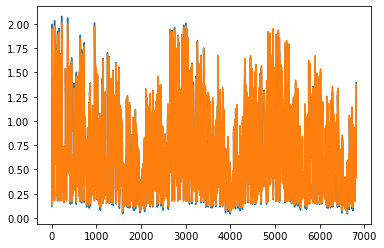

In [34]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

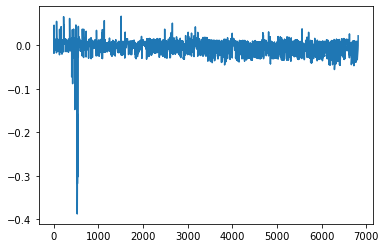

In [35]:
Y_diff['q_abs'].plot()

<AxesSubplot:>

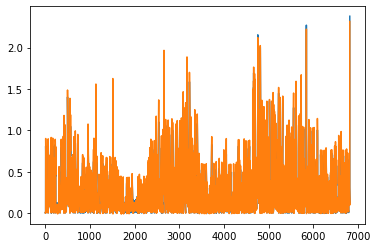

In [36]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

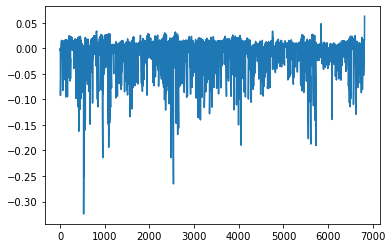

In [37]:
Y_diff['q_sca'].plot()

<AxesSubplot:>

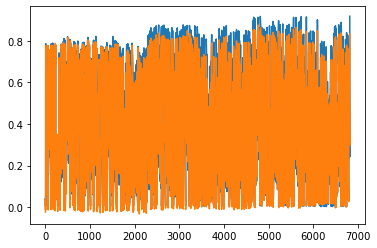

In [38]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

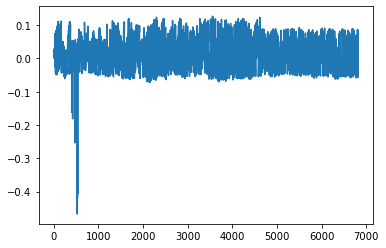

In [39]:
Y_diff['g'].plot()

<AxesSubplot:>

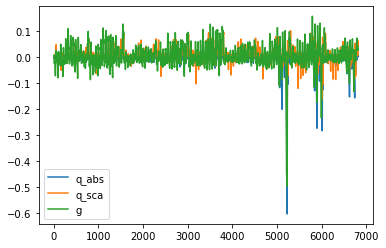

In [16]:
Y_diff.plot()

In [11]:
df = pd.read_excel('database_new.xlsx')
plot_set=df[(df['fractal_dimension']==2.3)&(df['wavelength']==467)]




<AxesSubplot:xlabel='number_of_primary_particles'>

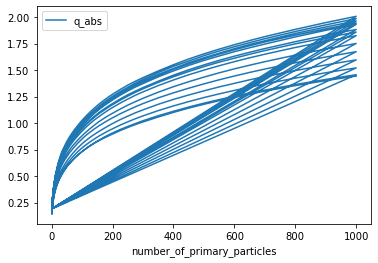

In [18]:
plot_set.plot('number_of_primary_particles','q_abs')

In [14]:
plot_set

,wavelength,fractal_dimension,fraction_of_coating,primary_particle_size,number_of_primary_particles,vol_equi_radius_outer,vol_equi_radius_inner,equi_mobility_dia,mie_epsilon,length_scale_factor,...,q_sca,g,c_geo,c_ext,c_abs,c_sca,ssa,mac_total,mac_bc,mac_organics
15469,467,2.3,0,15.0,1.0,15.000000,15.000000,23.829600,2,0.134544,...,0.001535,0.007075,706.858347,0.000136,0.000135,0.000001,0.008000,6.343333,6.343333,na
15470,467,2.3,0,15.0,2.0,18.898816,18.898816,33.934547,2,0.134544,...,0.003927,0.017365,1122.067684,0.000285,0.000280,0.000004,0.015476,6.609938,6.609938,na
15471,467,2.3,0,15.0,3.0,21.633744,21.633744,41.730020,2,0.134544,...,0.006626,0.028638,1470.324613,0.000437,0.000427,0.000010,0.022283,6.718902,6.718902,na
15472,467,2.3,0,15.0,4.0,23.811016,23.811016,48.324498,2,0.134544,...,0.009571,0.035854,1781.171422,0.000591,0.000574,0.000017,0.028825,6.771236,6.771236,na
15473,467,2.3,0,15.0,5.0,25.649639,25.649639,54.149126,2,0.134544,...,0.012855,0.042069,2066.866345,0.000755,0.000728,0.000027,0.035202,6.867933,6.867933,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16247,467,2.3,90,29.0,650.0,251.209341,129.935866,1253.168019,2,0.134544,...,1.553400,0.869080,198253.763135,0.560444,0.252456,0.307967,0.549507,3.290605,18.315521,4.011279
16248,467,2.3,90,29.0,700.0,257.492161,133.185600,1301.438025,2,0.134544,...,1.608000,0.870300,208294.544403,0.606075,0.271137,0.334938,0.552634,3.281660,18.265733,4.000375
16249,467,2.3,90,29.0,800.0,269.212152,139.247665,1393.154829,2,0.134544,...,1.710600,0.872330,227687.502395,0.697862,0.308380,0.389482,0.558108,3.265870,18.177850,3.981128
16250,467,2.3,90,29.0,900.0,279.991922,144.823408,1479.405303,2,0.134544,...,1.805300,0.872630,246286.651870,0.789669,0.345048,0.444621,0.563048,3.248174,18.079352,3.959556


# Fraction of coating 70,80,90

In [7]:
#Gridsearchcv
import pandas as pd
df = pd.read_excel('database_new.xlsx')

In [3]:


df_train = df[(df['fraction_of_coating'] < 70)]
df_test = df[(df['fraction_of_coating'] >= 70)]
df_test['wavelength'].size

14500

In [1]:
parameters=[{'alpha':[0.0001, 0.001, 0.01,0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.001, 0.01,0.05,0.5, 0.75, 1]}]

In [7]:

# Load dataset



df = pd.read_excel('database_new.xlsx')

df_train = df[(df['fraction_of_coating'] < 70)]
df_test = df[(df['fraction_of_coating'] >= 70)]
Y_train = df_train.iloc[:, 25:28]
X_train = df_train.iloc[:, :8]
Y_test = df_test.iloc[:, 25:28]
X_test = df_test.iloc[:, :8]
# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)

#scaling_y = PowerTransformer(method='box-cox')

#Y_train_transformed = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

regressor= KernelRidge()
model=regressor.fit(X_train_transformed,Y_train)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=2,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train_transformed,Y_train)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']
print(parameter_alpha)
print(parameter_gamma)

                          cols  box_cox_lambdas
0                   wavelength        -1.862685
1            fractal_dimension         0.671153
2          fraction_of_coating         0.235982
3        primary_particle_size        -5.690486
4  number_of_primary_particles         0.107323
5        vol_equi_radius_outer         0.294574
6        vol_equi_radius_inner         0.321969
7            equi_mobility_dia         0.202535
Best score in CV:  -0.050053466027851184
Best parameters in CV:  {'alpha': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.001
0.01


# 2.5,2.7,2.9

# With Powertransform 

In [7]:
#Gridsearchcv

In [6]:
parameters=[{'alpha':[0.0001, 0.001, 0.1],
            'kernel':['rbf'],
            'gamma':[0, 0.001, 0.01,0.05,0.5, 0.75, 1]}]

In [8]:

# Load dataset

train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
test_set.sort_values(by=['fractal_dimension'], inplace=True)
test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)

scaling_y = PowerTransformer(method='box-cox')

Y_train_transformed = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

regressor= KernelRidge()
model=regressor.fit(X_train_transformed,Y_train_transformed)
grid_search=GridSearchCV(estimator=model,
                        param_grid=parameters,
                         cv=5,
                         scoring='neg_mean_absolute_error',
                        n_jobs=-1
                        )
grid_search= grid_search.fit(X_train_transformed,Y_train_transformed)
print('Best score in CV: ', grid_search.best_score_)
print('Best parameters in CV: ', grid_search.best_params_)
#grid_search=grid_search_cv(parameters, model, X_train, Y_train)

parameter_alpha=grid_search.best_params_['alpha']
parameter_kernel=grid_search.best_params_['kernel']
parameter_gamma=grid_search.best_params_['gamma']
print(parameter_alpha)
print(parameter_gamma)

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


                          cols  box_cox_lambdas
0                   wavelength        -1.882303
1            fractal_dimension         0.677943
2          fraction_of_coating         0.252202
3        primary_particle_size        -3.509534
4  number_of_primary_particles         0.108123
5        vol_equi_radius_outer         0.213367
6        vol_equi_radius_inner         0.324368
7            equi_mobility_dia         0.178682
Best score in CV:  -0.08181929387669945
Best parameters in CV:  {'alpha': 0.001, 'gamma': 0.01, 'kernel': 'rbf'}
0.001
0.01


# Leave fractal dimesnion: =2.5,2.7,2.9 as test set

In [13]:


# Load dataset

train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
test_set.sort_values(by=['fractal_dimension'], inplace=True)
test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)
X_test_transformed = pt.transform(X_test+0.000000001)

#scaling_y = PowerTransformer(method='box-cox')

#Y_train = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

regressor = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train_transformed, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test_transformed)
# Y_pred=wrapper.predict(X_test)

#Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])

error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)




C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


                          cols  box_cox_lambdas
0                   wavelength        -1.882303
1            fractal_dimension         0.677943
2          fraction_of_coating         0.252202
3        primary_particle_size        -3.509534
4  number_of_primary_particles         0.108123
5        vol_equi_radius_outer         0.213367
6        vol_equi_radius_inner         0.324368
7            equi_mobility_dia         0.178682
Mean absolute error on test set:  [0.03298199 0.0393831  0.08791375]
Mean absolute error on test set [q_abs, q_sca, g]:-   [0.03298199 0.0393831  0.08791375]


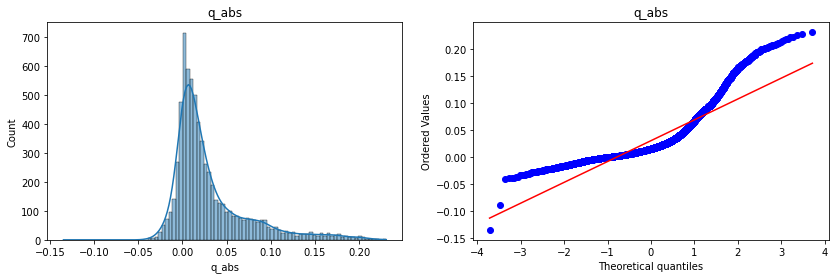

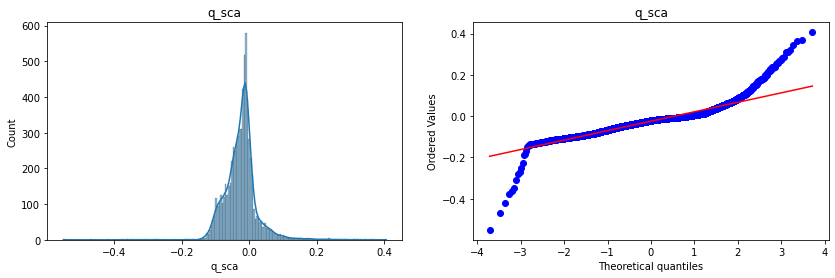

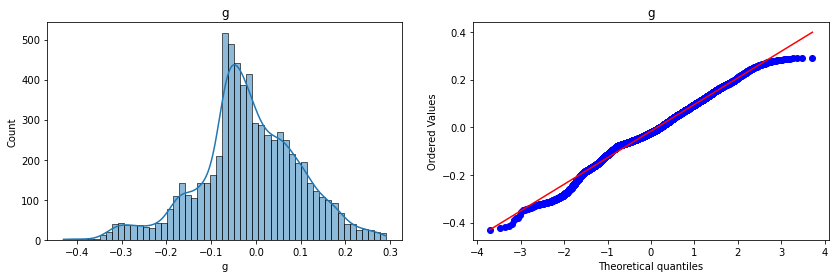

In [14]:
for col in Y_diff.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(Y_diff[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(Y_diff[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

# Training residual error

In [15]:
# Load dataset

train_set = df[(df['fractal_dimension'] < 2.5)]

Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]


# Applying Box-Cox Transform

pt = PowerTransformer(method='box-cox')

X_train_transformed = pt.fit_transform(X_train+0.00000000001)


#scaling_y = PowerTransformer(method='box-cox')

#Y_train = scaling_y.fit_transform(Y_train+0.00000000001)

print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))
regressor = KernelRidge(alpha=0.001, gamma=0.01, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train_transformed, Y_train)
# wrapper.fit(X_train, Y_train)

Y_train_pred = model.predict(X_train_transformed)
# Y_pred=wrapper.predict(X_test)

#Y_pred = scaling_y.inverse_transform(Y_pred)
Y_train_pred = pd.DataFrame(data=Y_train_pred, columns=["q_abs", "q_sca", "g"])

train_error = mean_absolute_error(Y_train, Y_train_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', train_error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_train = pd.DataFrame(data=Y_train, columns=["q_abs", "q_sca", "g"])

# logging difference between the two
Y_train_diff = Y_train - Y_train_pred


train_error = mean_absolute_error(Y_train, Y_train_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', train_error)


                          cols  box_cox_lambdas
0                   wavelength        -1.882303
1            fractal_dimension         0.677943
2          fraction_of_coating         0.252202
3        primary_particle_size        -3.509534
4  number_of_primary_particles         0.108123
5        vol_equi_radius_outer         0.213367
6        vol_equi_radius_inner         0.324368
7            equi_mobility_dia         0.178682
Mean absolute error on test set:  [0.00572528 0.00656966 0.02346242]
Mean absolute error on test set [q_abs, q_sca, g]:-   [0.00572528 0.00656966 0.02346242]


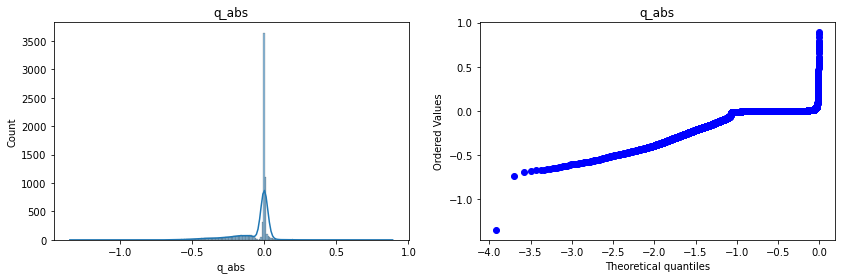

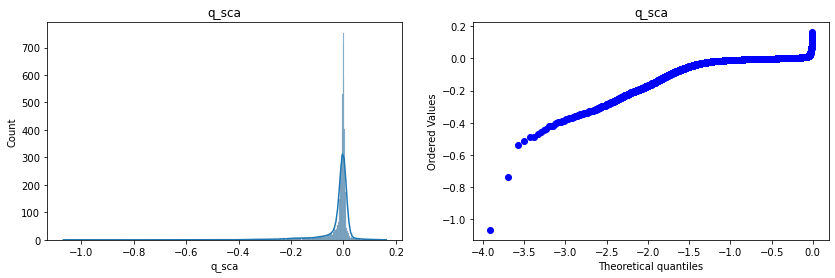

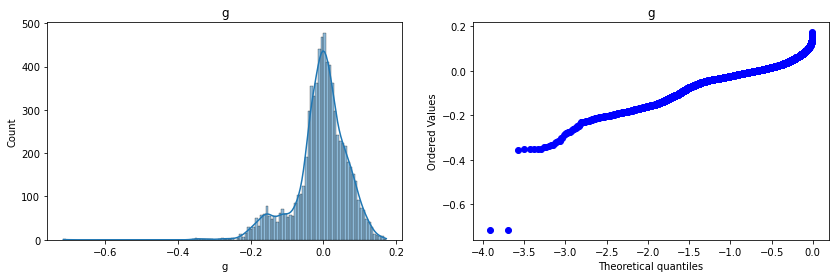

In [16]:
for col in Y_train_diff.columns:
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    sns.histplot(Y_train_diff[col],kde=True)
    plt.title(col)

    plt.subplot(122)
    stats.probplot(Y_train_diff[col], dist="norm", plot=plt)
    plt.title(col)

    plt.show()

<AxesSubplot:>

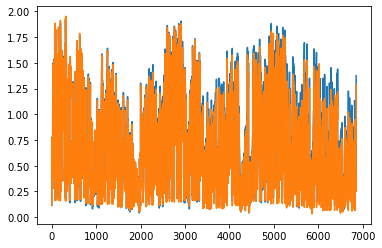

In [17]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

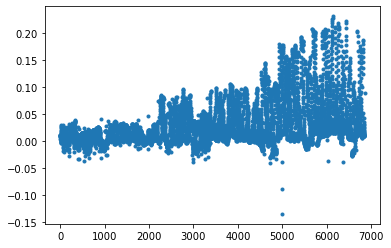

In [18]:
Y_diff['q_abs'].plot(style='.')

<AxesSubplot:>

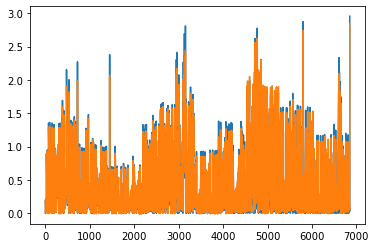

In [19]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

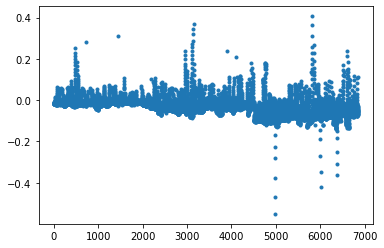

In [20]:
Y_diff['q_sca'].plot(style='.')

<AxesSubplot:>

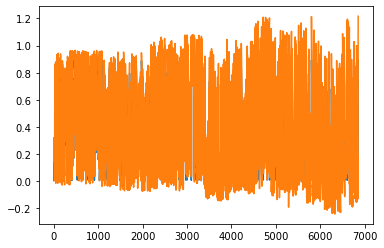

In [21]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

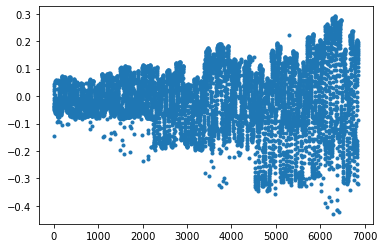

In [22]:
Y_diff['g'].plot(style='.')

<AxesSubplot:>

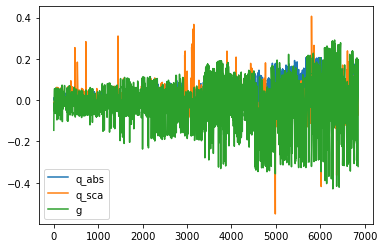

In [23]:
Y_diff.plot()

# NN

In [6]:


import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from keras.regularizers import l2



# Load dataset

train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
test_set.sort_values(by=['fractal_dimension'], inplace=True)
test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

# Applying Box-Cox Transform

#pt = PowerTransformer(method='box-cox')
pt = PowerTransformer()
X_train_transformed = pt.fit_transform(X_train)
X_test_transformed = pt.transform(X_test)

scaling_y = PowerTransformer()

Y_train = scaling_y.fit_transform(Y_train)
#Y_test = scaling_y.transform(Y_test+0.00000000001)
print(pd.DataFrame({'cols':X_train.columns,'box_cox_lambdas':pt.lambdas_}))

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(8,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
#model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
#model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(3, kernel_initializer='he_normal', activation='linear'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('fractal_dimension/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train_transformed, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('fractal_dimension/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Evaluate plus inverse transforms

# Inverse transform
#Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test_transformed)
Y_pred = scaling_y.inverse_transform(Y_pred)
#Y_test = scaling_y.inverse_transform(Y_test)
# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])
Y_test.reset_index(inplace=True, drop=True)

Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])

Y_diff = Y_test - Y_pred

error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)



C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


                          cols  box_cox_lambdas
0                   wavelength        -1.886731
1            fractal_dimension         0.662825
2          fraction_of_coating         0.416872
3        primary_particle_size        -3.721306
4  number_of_primary_particles         0.066335
5        vol_equi_radius_outer         0.200702
6        vol_equi_radius_inner         0.312102
7            equi_mobility_dia         0.173614
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4608      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)     

292/292 [==============================] - 2s 5ms/step - loss: 8.5363e-04 - mean_absolute_error: 0.0188 - val_loss: 0.0377 - val_mean_absolute_error: 0.1264

Epoch 00065: val_loss did not improve from 0.02510
Epoch 66/1000
292/292 [==============================] - 2s 5ms/step - loss: 8.6000e-04 - mean_absolute_error: 0.0189 - val_loss: 0.0414 - val_mean_absolute_error: 0.1330

Epoch 00066: val_loss did not improve from 0.02510
Epoch 67/1000
292/292 [==============================] - 2s 5ms/step - loss: 0.0013 - mean_absolute_error: 0.0236 - val_loss: 0.0401 - val_mean_absolute_error: 0.1340

Epoch 00067: val_loss did not improve from 0.02510
Epoch 68/1000
292/292 [==============================] - 2s 5ms/step - loss: 6.9232e-04 - mean_absolute_error: 0.0181 - val_loss: 0.0361 - val_mean_absolute_error: 0.1220

Epoch 00068: val_loss did not improve from 0.02510
Epoch 69/1000
292/292 [==============================] - 2s 5ms/step - loss: 0.0012 - mean_absolute_error: 0.0229 - val_loss: 

292/292 [==============================] - 2s 5ms/step - loss: 6.4339e-04 - mean_absolute_error: 0.0163 - val_loss: 0.0348 - val_mean_absolute_error: 0.1206

Epoch 00102: val_loss did not improve from 0.02510
Epoch 103/1000
292/292 [==============================] - 2s 5ms/step - loss: 7.0255e-04 - mean_absolute_error: 0.0174 - val_loss: 0.0377 - val_mean_absolute_error: 0.1278

Epoch 00103: val_loss did not improve from 0.02510
Epoch 104/1000
292/292 [==============================] - ETA: 0s - loss: 8.5045e-04 - mean_absolute_error: 0.018 - 2s 5ms/step - loss: 8.4078e-04 - mean_absolute_error: 0.0186 - val_loss: 0.0337 - val_mean_absolute_error: 0.1147

Epoch 00104: val_loss did not improve from 0.02510
Epoch 105/1000
292/292 [==============================] - 2s 5ms/step - loss: 5.4340e-04 - mean_absolute_error: 0.0152 - val_loss: 0.0326 - val_mean_absolute_error: 0.1144

Epoch 00105: val_loss did not improve from 0.02510
Epoch 106/1000
292/292 [==============================] - 2s 

C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but PowerTransformer was fitted with feature names
  warnings.warn(


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [9]:
Y_pred_inv = scaling_y.inverse_transform(Y_pred-0.00000000001)
#Y_test = scaling_y.inverse_transform(Y_test)
# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])
Y_test.reset_index(inplace=True, drop=True)

Y_pred_inv = pd.DataFrame(data=Y_pred_inv, columns=["q_abs", "q_sca", "g"])

Y_diff = Y_test - Y_pred_inv

error = mean_absolute_error(Y_test, Y_pred_inv, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)


ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

<AxesSubplot:>

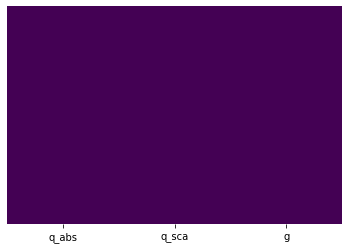

In [26]:
sns.heatmap(Y_pred.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [7]:
Y_pred = model.predict(X_test_transformed)
#Y_pred = scaling_y.inverse_transform(Y_pred)

# logging Y_test values
#Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])
# Y_test.reset_index(inplace=True, drop=True)

Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])

Y_diff = Y_test - Y_pred

error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)



Mean absolute error on test set [q_abs, q_sca, g]:-   [0.70775353 0.76613953 0.92541681]


<AxesSubplot:>

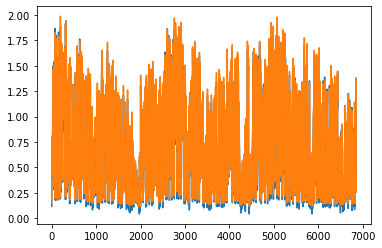

In [27]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

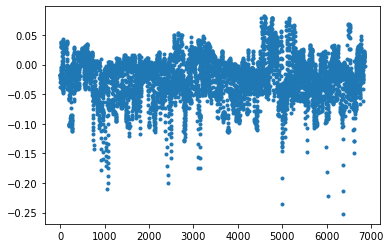

In [28]:
Y_diff['q_abs'].plot(style='.')

<AxesSubplot:>

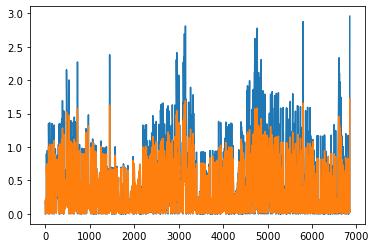

In [29]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

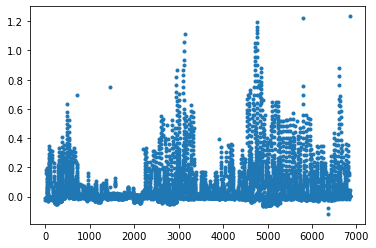

In [30]:
Y_diff['q_sca'].plot(style='.')

<AxesSubplot:>

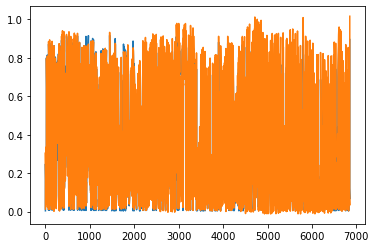

In [31]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

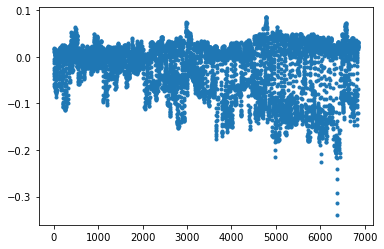

In [32]:
Y_diff['g'].plot(style='.')

<AxesSubplot:>

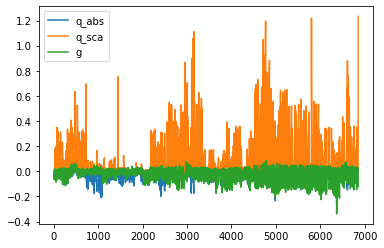

In [33]:
Y_diff.plot()

In [34]:
#huber loss

In [2]:


import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from keras.regularizers import l2





# Load dataset
df = pd.read_excel('database_new.xlsx')
X = df.iloc[:, :8]
Y = df.iloc[:, 25:28]


train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
test_set.sort_values(by=['fractal_dimension'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
print(len(test_set))

Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
"""
# Standardizing data and targets
scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
"""
# Normalizaing Min max
scaling_x = MinMaxScaler()
scaling_y = MinMaxScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
# Build NN model

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(8,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(3, kernel_initializer='glorot_normal', activation='sigmoid'))
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('fractal_dimension/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('fractal_dimension/best_model.hdf5')  # load it
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_squared_error'])
# Evaluate plus inverse transforms

# Inverse transform
Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test)
Y_pred = scaling_y.inverse_transform(Y_pred)

# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])
# Y_test.reset_index(inplace=True, drop=True)

Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])

Y_diff = Y_test - Y_pred

error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)



C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6853
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4608      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 268,803
Trainable params: 268,803
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
292/292 [==============================] - 5s 5ms/step - loss: 0.0075 - mean_absolute_error: 0.0521 - val_loss: 0.0207 - val_mean_absolute_error: 0.0937

Epoch 00001: val_loss improved from inf to 0.02074, saving model to fractal_dimension\best_model.hdf5
Epoch 2/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0029 - mean_absolute_er

292/292 [==============================] - 1s 4ms/step - loss: 7.4122e-05 - mean_absolute_error: 0.0050 - val_loss: 0.0012 - val_mean_absolute_error: 0.0173

Epoch 00068: val_loss did not improve from 0.00090
Epoch 69/1000
292/292 [==============================] - 1s 4ms/step - loss: 7.1632e-05 - mean_absolute_error: 0.0049 - val_loss: 0.0010 - val_mean_absolute_error: 0.0155

Epoch 00069: val_loss did not improve from 0.00090
Epoch 70/1000
292/292 [==============================] - ETA: 0s - loss: 7.2219e-05 - mean_absolute_error: 0.004 - 1s 4ms/step - loss: 7.1959e-05 - mean_absolute_error: 0.0048 - val_loss: 0.0012 - val_mean_absolute_error: 0.0178

Epoch 00070: val_loss did not improve from 0.00090
Epoch 71/1000
292/292 [==============================] - 1s 4ms/step - loss: 7.0916e-05 - mean_absolute_error: 0.0049 - val_loss: 0.0012 - val_mean_absolute_error: 0.0171

Epoch 00071: val_loss did not improve from 0.00090
Epoch 72/1000
292/292 [==============================] - 1s 4ms/

<AxesSubplot:>

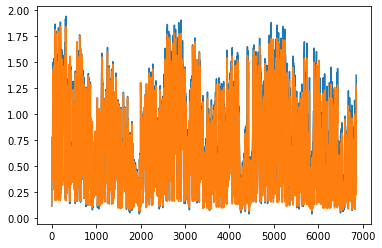

In [3]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

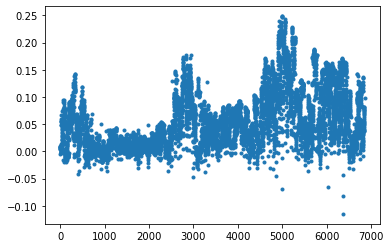

In [17]:
Y_diff['q_abs'].plot(style='.')

<AxesSubplot:>

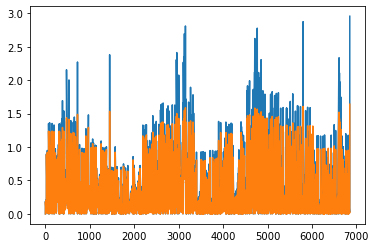

In [10]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

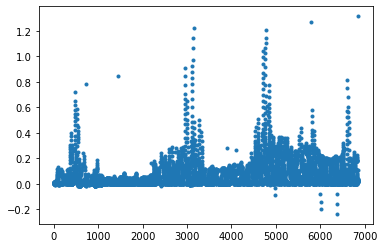

In [16]:
Y_diff['q_sca'].plot(style='.')

<AxesSubplot:>

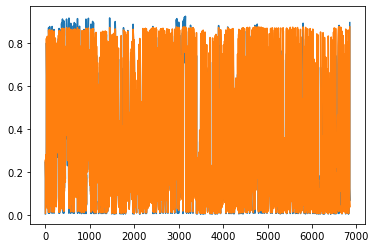

In [30]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

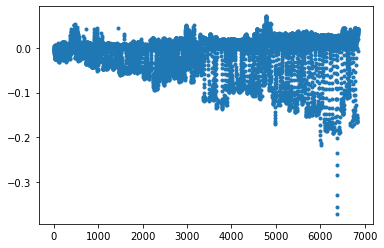

In [15]:
Y_diff['g'].plot(style='.')

<AxesSubplot:>

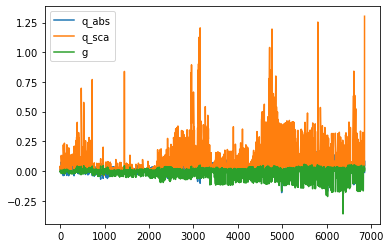

In [32]:
Y_diff.plot()

In [33]:
#huber loss

In [2]:


# Load dataset
df = pd.read_excel('database_new.xlsx')

train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
test_set.sort_values(by=['fractal_dimension'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

scaling_x = MinMaxScaler()
scaling_y = MinMaxScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)

regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_test)
# Y_pred=wrapper.predict(X_test)

Y_pred = scaling_y.inverse_transform(Y_pred)
Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])

# logging difference between the two
Y_diff = Y_test - Y_pred


error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)




import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from keras.regularizers import l2





# Load dataset
df = pd.read_excel('database_new.xlsx')
X = df.iloc[:, :8]
Y = df.iloc[:, 25:28]


train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
test_set.sort_values(by=['fractal_dimension'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
print(len(test_set))

Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
"""
# Standardizing data and targets
scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
"""
# Normalizaing Min max
scaling_x = MinMaxScaler()
scaling_y = MinMaxScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
# Build NN model

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(8,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(3, kernel_initializer='glorot_normal', activation='sigmoid'))
# Compile model
model.compile(loss='huber_loss', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('fraction_of_coating/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('fraction_of_coating/best_model.hdf5')  # load it
model.compile(loss='huber_loss', optimizer='adam', metrics=['mean_absolute_error'])
# Evaluate plus inverse transforms

# Inverse transform
Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test)
Y_pred = scaling_y.inverse_transform(Y_pred)

# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])
# Y_test.reset_index(inplace=True, drop=True)

Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])

Y_diff = Y_test - Y_pred

error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)



C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6853
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4608      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 268,803
Trainable params: 268,803
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
292/292 [==============================] - 2s 5ms/step - loss: 0.0032 - mean_absolute_error: 0.0478 - val_loss: 0.0022 - val_mean_absolute_error: 0.0491

Epoch 00001: val_loss improved from inf to 0.00217, saving model to fraction_of_coating\best_model.hdf5
Epoch 2/1000
292/292 [==============================] - 1s 4ms/step - loss: 1.9098e-04 - mean_absol

292/292 [==============================] - 1s 4ms/step - loss: 3.9405e-05 - mean_absolute_error: 0.0052 - val_loss: 6.2101e-04 - val_mean_absolute_error: 0.0196

Epoch 00066: val_loss did not improve from 0.00053
Epoch 67/1000
292/292 [==============================] - 1s 4ms/step - loss: 3.8215e-05 - mean_absolute_error: 0.0051 - val_loss: 5.7460e-04 - val_mean_absolute_error: 0.0191

Epoch 00067: val_loss did not improve from 0.00053
Epoch 68/1000
292/292 [==============================] - 1s 4ms/step - loss: 3.6275e-05 - mean_absolute_error: 0.0050 - val_loss: 5.6842e-04 - val_mean_absolute_error: 0.0186

Epoch 00068: val_loss did not improve from 0.00053
Epoch 69/1000
292/292 [==============================] - 1s 4ms/step - loss: 3.4053e-05 - mean_absolute_error: 0.0047 - val_loss: 6.7618e-04 - val_mean_absolute_error: 0.0212

Epoch 00069: val_loss did not improve from 0.00053
Epoch 70/1000
292/292 [==============================] - 1s 4ms/step - loss: 3.5007e-05 - mean_absolute_er

292/292 [==============================] - 1s 5ms/step - loss: 2.0025e-05 - mean_absolute_error: 0.0036 - val_loss: 6.3569e-04 - val_mean_absolute_error: 0.0196

Epoch 00138: val_loss did not improve from 0.00053
Epoch 139/1000
292/292 [==============================] - 1s 4ms/step - loss: 1.9349e-05 - mean_absolute_error: 0.0035 - val_loss: 6.0220e-04 - val_mean_absolute_error: 0.0191

Epoch 00139: val_loss did not improve from 0.00053
Epoch 140/1000
292/292 [==============================] - 1s 4ms/step - loss: 2.1350e-05 - mean_absolute_error: 0.0038 - val_loss: 5.8360e-04 - val_mean_absolute_error: 0.0185

Epoch 00140: val_loss did not improve from 0.00053
Epoch 141/1000
292/292 [==============================] - 1s 4ms/step - loss: 2.1054e-05 - mean_absolute_error: 0.0037 - val_loss: 5.9944e-04 - val_mean_absolute_error: 0.0188

Epoch 00141: val_loss did not improve from 0.00053
Epoch 142/1000
292/292 [==============================] - 1s 4ms/step - loss: 2.3333e-05 - mean_absolut

292/292 [==============================] - 1s 4ms/step - loss: 1.5047e-05 - mean_absolute_error: 0.0030 - val_loss: 5.7590e-04 - val_mean_absolute_error: 0.0185

Epoch 00209: val_loss did not improve from 0.00050
Epoch 210/1000
292/292 [==============================] - 1s 5ms/step - loss: 1.4243e-05 - mean_absolute_error: 0.0030 - val_loss: 5.5694e-04 - val_mean_absolute_error: 0.0176

Epoch 00210: val_loss did not improve from 0.00050
Epoch 211/1000
292/292 [==============================] - 1s 5ms/step - loss: 1.4757e-05 - mean_absolute_error: 0.0031 - val_loss: 5.6323e-04 - val_mean_absolute_error: 0.0181

Epoch 00211: val_loss did not improve from 0.00050
Epoch 212/1000
292/292 [==============================] - 1s 5ms/step - loss: 1.5395e-05 - mean_absolute_error: 0.0032 - val_loss: 5.1864e-04 - val_mean_absolute_error: 0.0163

Epoch 00212: val_loss did not improve from 0.00050
Epoch 213/1000
292/292 [==============================] - 1s 4ms/step - loss: 1.3712e-05 - mean_absolut

292/292 [==============================] - 1s 5ms/step - loss: 1.2453e-05 - mean_absolute_error: 0.0029 - val_loss: 5.4910e-04 - val_mean_absolute_error: 0.0171

Epoch 00245: val_loss did not improve from 0.00050
Epoch 246/1000
292/292 [==============================] - 1s 4ms/step - loss: 1.3694e-05 - mean_absolute_error: 0.0028 - val_loss: 5.4346e-04 - val_mean_absolute_error: 0.0175

Epoch 00246: val_loss did not improve from 0.00050
Epoch 247/1000
292/292 [==============================] - 1s 5ms/step - loss: 1.4480e-05 - mean_absolute_error: 0.0029 - val_loss: 5.2293e-04 - val_mean_absolute_error: 0.0165

Epoch 00247: val_loss did not improve from 0.00050
Epoch 248/1000
292/292 [==============================] - 1s 5ms/step - loss: 1.5033e-05 - mean_absolute_error: 0.0031 - val_loss: 5.2453e-04 - val_mean_absolute_error: 0.0165

Epoch 00248: val_loss did not improve from 0.00050
Epoch 249/1000
292/292 [==============================] - 1s 5ms/step - loss: 1.3175e-05 - mean_absolut

<AxesSubplot:>

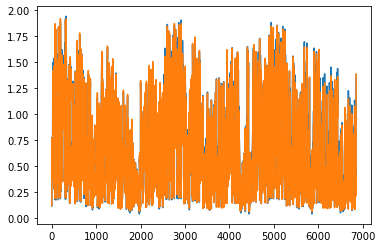

In [26]:
ax=Y_test['q_abs'].plot()
Y_pred['q_abs'].plot(ax=ax)

<AxesSubplot:>

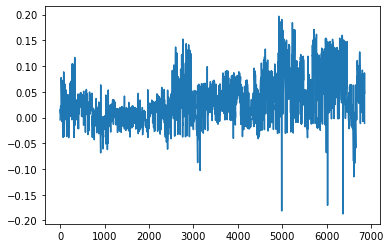

In [27]:
Y_diff['q_abs'].plot()

<AxesSubplot:>

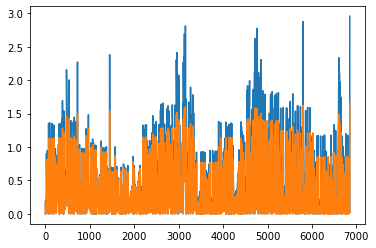

In [28]:
ax=Y_test['q_sca'].plot()
Y_pred['q_sca'].plot(ax=ax)

<AxesSubplot:>

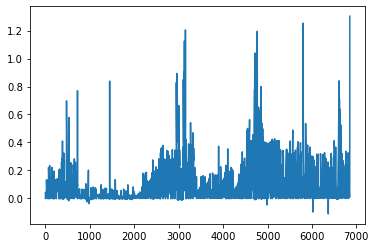

In [29]:
Y_diff['q_sca'].plot()

<AxesSubplot:>

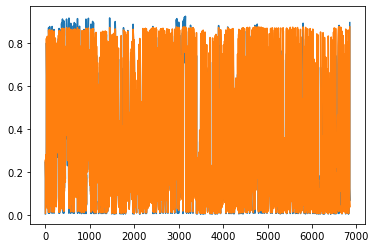

In [30]:
ax=Y_test['g'].plot()
Y_pred['g'].plot(ax=ax)

<AxesSubplot:>

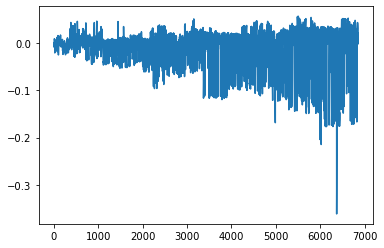

In [31]:
Y_diff['g'].plot()

<AxesSubplot:>

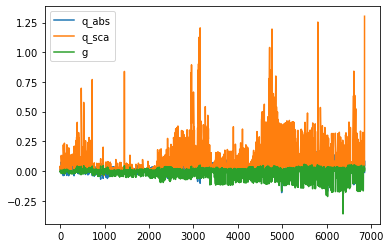

In [32]:
Y_diff.plot()

In [2]:


import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, LeakyReLU
from tensorflow.keras.activations import sigmoid
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, CSVLogger
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from keras.regularizers import l2





# Load dataset
df = pd.read_excel('database_new.xlsx')
X = df.iloc[:, :8]
Y = df.iloc[:, 25:28]


train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
test_set.sort_values(by=['fractal_dimension'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
print(len(test_set))

Y_train = train_set.iloc[:, 25:28]
X_train = train_set.iloc[:, :8]
Y_test = test_set.iloc[:, 25:28]
X_test = test_set.iloc[:, :8]
"""
# Standardizing data and targets
scaling_x = StandardScaler()
scaling_y = StandardScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
"""
# Normalizaing Min max
scaling_x = MinMaxScaler()
scaling_y = MinMaxScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)
Y_test = scaling_y.transform(Y_test)
# Build NN model

#model = build_model()  # params.actuvation
model = Sequential()
model.add(Input(shape=(8,)))


model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))
model.add(Dense(512, kernel_initializer='he_normal', activation='relu'))


model.add(Dense(3, kernel_initializer='glorot_normal', activation='sigmoid'))
# Compile model
model.compile(loss='mean_absolute_error', optimizer='adam',
              metrics=['mean_absolute_error'])

print(model.summary())

# Running and logging model plus Early stopping


    # print(model_file.name)
checkpoint = ModelCheckpoint('fractal_dimension/best_model.hdf5', verbose=1, monitor='val_loss', save_best_only=True, mode='auto')

    # # patient early stopping
es = EarlyStopping(monitor='val_loss', patience=100, verbose=1)

    # log_csv = CSVLogger('fractal_dimension_loss_logs.csv', separator=',', append=False)

callback_list = [checkpoint, es]
history = model.fit(X_train, Y_train, epochs=1000, batch_size=32, validation_split=0.2, callbacks=callback_list)

    # choose the best Weights for prediction

    # Save the model

    # Save metrics loss and val_loss
    # print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = len(loss)
print(epochs)
    # Use best model to predict
#weights_file = f'fractal_dimension_{_run._id}/best_model.hdf5'  # choose the best checkpoint
model.load_weights('fractal_dimension/best_model.hdf5')  # load it
model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
# Evaluate plus inverse transforms

# Inverse transform
Y_test = scaling_y.inverse_transform(Y_test)
Y_pred = model.predict(X_test)
Y_pred = scaling_y.inverse_transform(Y_pred)

# logging Y_test values
Y_test = pd.DataFrame(data=Y_test, columns=["q_abs", "q_sca", "g"])
# Y_test.reset_index(inplace=True, drop=True)

Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])

Y_diff = Y_test - Y_pred

error = mean_absolute_error(Y_test, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)



C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


6853
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               4608      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 1539      
Total params: 268,803
Trainable params: 268,803
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1000
292/292 [==============================] - 5s 4ms/step - loss: 0.0539 - mean_absolute_error: 0.0539 - val_loss: 0.0439 - val_mean_absolute_error: 0.0439

Epoch 00001: val_loss improved from inf to 0.04394, saving model to fractal_dimension\best_model.hdf5
Epoch 2/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0158 - mean_absolute_er

292/292 [==============================] - 1s 4ms/step - loss: 0.0055 - mean_absolute_error: 0.0055 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165

Epoch 00033: val_loss did not improve from 0.01562
Epoch 34/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - val_loss: 0.0196 - val_mean_absolute_error: 0.0196

Epoch 00034: val_loss did not improve from 0.01562
Epoch 35/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0056 - mean_absolute_error: 0.0056 - val_loss: 0.0165 - val_mean_absolute_error: 0.0165

Epoch 00035: val_loss did not improve from 0.01562
Epoch 36/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - val_loss: 0.0185 - val_mean_absolute_error: 0.0185

Epoch 00036: val_loss did not improve from 0.01562
Epoch 37/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0053 - mean_absolute_error: 0.0053 - val_loss: 0.0159 - val

292/292 [==============================] - 1s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.0131 - val_mean_absolute_error: 0.0131

Epoch 00106: val_loss did not improve from 0.01182
Epoch 107/1000
292/292 [==============================] - 1s 3ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.0134 - val_mean_absolute_error: 0.0134

Epoch 00107: val_loss did not improve from 0.01182
Epoch 108/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0121 - val_mean_absolute_error: 0.0121

Epoch 00108: val_loss did not improve from 0.01182
Epoch 109/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.0124 - val_mean_absolute_error: 0.0124

Epoch 00109: val_loss did not improve from 0.01182
Epoch 110/1000
292/292 [==============================] - 1s 3ms/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.0139 -

292/292 [==============================] - 1s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0141 - val_mean_absolute_error: 0.0141

Epoch 00180: val_loss did not improve from 0.01182
Epoch 181/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0030 - mean_absolute_error: 0.0030 - val_loss: 0.0135 - val_mean_absolute_error: 0.0135

Epoch 00181: val_loss did not improve from 0.01182
Epoch 182/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0142 - val_mean_absolute_error: 0.0142

Epoch 00182: val_loss did not improve from 0.01182
Epoch 183/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0138 - val_mean_absolute_error: 0.0138

Epoch 00183: val_loss did not improve from 0.01182
Epoch 184/1000
292/292 [==============================] - 1s 4ms/step - loss: 0.0031 - mean_absolute_error: 0.0031 - val_loss: 0.0133 -

In [2]:


# Load dataset
df = pd.read_excel('database_new.xlsx')

train_set = df[(df['fractal_dimension'] < 2.5)]
test_set = df[(df['fractal_dimension'] >= 2.5)]
test_set.sort_values(by=['fractal_dimension'], inplace=True)

test_set.reset_index(inplace=True)
test_set.drop('index',axis=1, inplace=True)
Y_train = train_set.iloc[:,25:28]
X_train = train_set.iloc[:,:8]
Y_test = test_set.iloc[:,25:28]
X_test = test_set.iloc[:,:8]

scaling_x = MinMaxScaler()
scaling_y = MinMaxScaler()
X_train = scaling_x.fit_transform(X_train)
X_test = scaling_x.transform(X_test)
Y_train = scaling_y.fit_transform(Y_train)

regressor = KernelRidge(alpha=0.0001, gamma=0.5, kernel='rbf')

# wrapper=MultiOutputRegressor(regressor)
model = regressor.fit(X_train, Y_train)
# wrapper.fit(X_train, Y_train)

Y_pred = model.predict(X_train)
# Y_pred=wrapper.predict(X_test)

Y_pred = scaling_y.inverse_transform(Y_pred)
Y_train = scaling_y.inverse_transform(Y_train)
Y_pred = pd.DataFrame(data=Y_pred, columns=["q_abs", "q_sca", "g"])
#Y_test.reset_index(inplace=True)
#Y_test.drop('index',axis=1, inplace=True)
error = mean_absolute_error(Y_train, Y_pred, multioutput='raw_values')

# error=calculate_mean_absolute_percentage_error_multi(parameter_alpha, parameter_kernel# parameter_gamma, X_train, Y_train, X_test, Y_test, scaling_y)
print('Mean absolute error on test set: ', error)
# Running and logging model plus Early stopping



# logging Y_test values
Y_train = pd.DataFrame(data=Y_train, columns=["q_abs", "q_sca", "g"])

# logging difference between the two
Y_diff = Y_train - Y_pred


error = mean_absolute_error(Y_train, Y_pred, multioutput='raw_values')

# error=error*100
print('Mean absolute error on test set [q_abs, q_sca, g]:-  ', error)




C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)
C:\Users\JK\anaconda3\envs\TUK\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


Mean absolute error on test set:  [0.00571818 0.00416506 0.01469453]
Mean absolute error on test set [q_abs, q_sca, g]:-   [0.00571818 0.00416506 0.01469453]


# Plots for fractal dimensions